
# Network Flow Problem

We have a network with nodes and edges, each represented by their respective weights. The objective is to find the most efficient way to distribute supplies while considering the capacities of the edges. Let's define the information we have:
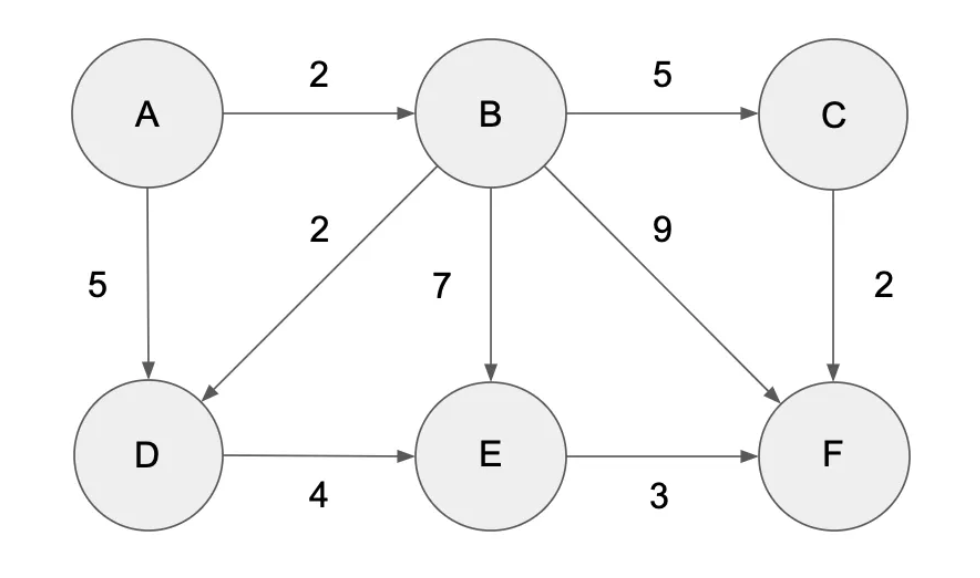

**Edges and Weights**:

| From | To | Weight |
|------|----|--------|
| A    | B  | 2      |
| A    | D  | 5      |
| B    | C  | 5      |
| B    | D  | 2      |
| B    | E  | 7      |
| B    | F  | 9      |
| C    | F  | 2      |
| D    | E  | 4      |
| E    | F  | 3      |

**Supply (or Demand) at Nodes**:

bA = 10, bB = 1, bC = -2, bD = -3, bE = 4, bF = -10

**Edge Capacity**:

Capacity of each edge is bounded by 6.

## Linear Optimization Formulation:

Let's consider the following variables:
- x: The vector representing the flow values for the 9 different routes.

The goal is to minimize the cost of the flow, which can be formulated as follows:

**Objective Function**:
Minimize $ C^T x $

**Subject to the constraints**:
- $ Ax = b $ (where A is the matrix representing the edges connecting different nodes)
- $ 0 \leq x \leq 6 $ (to satisfy the capacity bounds)

In other words, we want to find the flow values (x) that minimize the total cost while satisfying the supply and capacity constraints.


In [1]:
# import numpy and cvxpy 
import numpy as np
import cvxpy as cp

(CVXPY) Aug 23 01:04:50 AM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [2]:
# (the weight of each edge)
cost = np.array([2, 5, 5, 2, 7, 9, 2, 4, 3])

In [3]:
# Our matrix, representing the connections between the nodes
A = np.array([[ 1,  1,  0,  0,  0,  0,  0,  0,  0],
              [-1,  0,  1,  1,  1,  1,  0,  0,  0],
              [ 0,  0, -1,  0,  0,  0,  1,  0,  0],
              [ 0, -1,  0, -1,  0,  0,  0,  1,  0],
              [ 0,  0,  0,  0, -1,  0,  0, -1,  1],
              [ 0,  0,  0,  0,  0, -1, -1,  0, -1]])

# b vector, which contains the information for bA to bF
b = np.array([10, 1, -2, -3, 4, -10])

In [4]:
# x to be a vector with 9 entries.
x = cp.Variable((9), nonneg=True)

In [5]:
#set objective function
objective = cp.Minimize(cost.T @ x)

In [6]:
#set constraints
constraints = [A @ x == b,
               x <= 6]

In [7]:
# create problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve()

98.00000002103977

In [11]:
#show results
print("The optimal value is", problem.value)
print("A solution x is",x.value.round())

The optimal value is 98.00000002103977
A solution x is [6. 4. 6. 0. 0. 1. 4. 1. 5.]
